### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load Dataset
df = pd.read_csv("emotion_dataset_raw.csv")

### EDA

In [6]:
df.shape

(34792, 2)

In [7]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [8]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [9]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [10]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

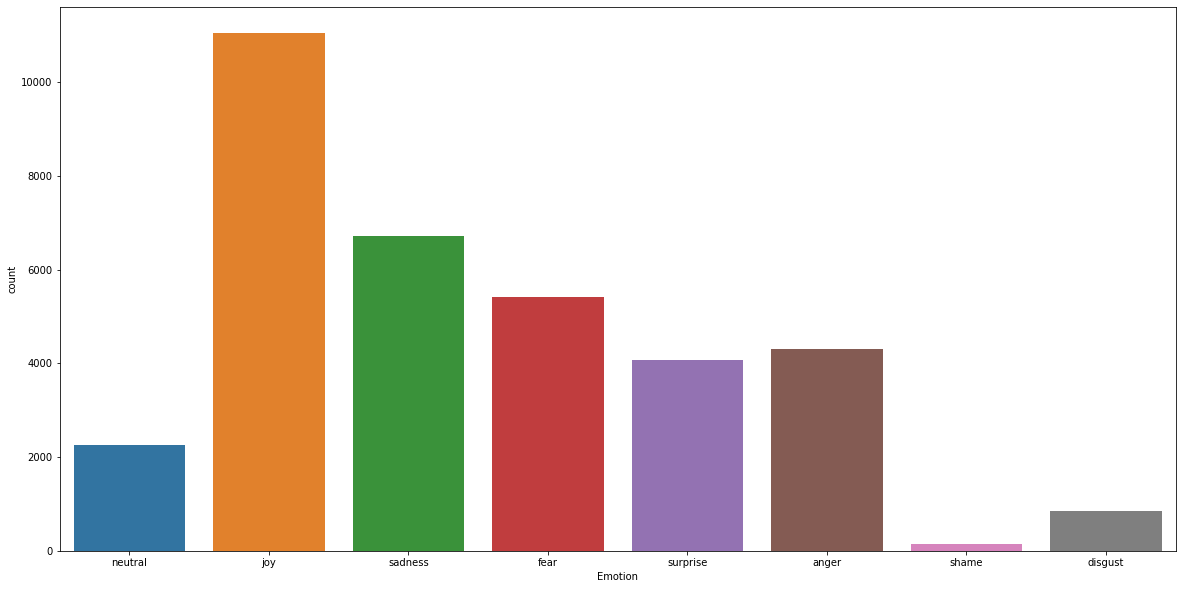

In [11]:
# Plot
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

### KEYWORD FOR EACH EMOTION
### WORDCLOUD

In [12]:
#Sentiment analysis
from textblob import TextBlob

In [13]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else :
        result = 'Neutral'
    return result
    

In [14]:
#testing
get_sentiment('I  Coding')

'Neutral'

In [15]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [16]:
#USING SEABORN
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x0000027652342C18>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


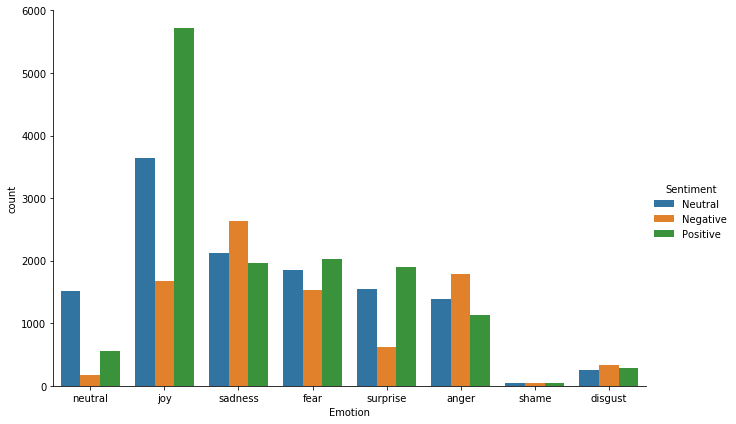

In [17]:
sns.catplot(x= 'Emotion',hue= "Sentiment",data=df,kind='count',size =6,aspect=1.5)

In [18]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [19]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [21]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [22]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [23]:
df.isnull().sum()

Emotion       0
Text          0
Sentiment     0
Clean_Text    0
dtype: int64

In [24]:
df

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,Positive,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,Positive,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,Neutral,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Neutral,Youu JEALOUSY #Losing YOU


In [25]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['text_lemmatized'] = df.Clean_Text.apply(lemmatize_text)

In [26]:
df.head()

,Emotion,Text,Sentiment,Clean_Text,text_lemmatized
0,neutral,Why ?,Neutral,,[]
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow,"[Sage, Act, upgrade, list, tommorow]"
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,"[WAY, HOMEGIRL, BABY, FUNERAL, MAN, HATE, FUNE..."
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...,"[eye, true, hazel, eyeand, brilliant, Regular,..."
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e b...,"[ugh, babe, hugggzzz, u, babe, naamazed, nga, ..."


In [27]:
# Xfeatures

In [28]:
# Features & Labels
Xfeatures = df['Clean_Text'].str.lower()
ylabels = df['Emotion'].str.lower()

In [29]:
Xfeatures

0                                                         
1                           sage act upgrade list tommorow
2        way homegirl baby funeral man hate funerals sh...
3        eye  true hazel eyeand brilliant  regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift hope like it hand wear  itll warm lol
34788           world didnt meso world definitely cnt away
34789                                    man robbed today 
34790                            youu jealousy #losing you
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [30]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [33]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer(tokenizer=lemmatize_text)),('lr',LogisticRegression())])

In [34]:
pipe_lr

Pipeline(steps=[('cv',
                 CountVectorizer(tokenizer=<function lemmatize_text at 0x00000276578A8708>)),
                ('lr', LogisticRegression())])

In [35]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('cv',
                 CountVectorizer(tokenizer=<function lemmatize_text at 0x00000276578A8708>)),
                ('lr', LogisticRegression())])

In [36]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6264610078559111

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
pipe_NB = Pipeline(steps=[('cv',CountVectorizer(tokenizer=lemmatize_text)),('nb',MultinomialNB())])

In [39]:
pipe_NB

Pipeline(steps=[('cv',
                 CountVectorizer(tokenizer=<function lemmatize_text at 0x00000276578A8708>)),
                ('nb', MultinomialNB())])

In [40]:
# Train and Fit Data
pipe_NB.fit(x_train,y_train)

Pipeline(steps=[('cv',
                 CountVectorizer(tokenizer=<function lemmatize_text at 0x00000276578A8708>)),
                ('nb', MultinomialNB())])

In [41]:
# Check Accuracy
pipe_NB.score(x_test,y_test)

0.5764514274765281

In [42]:
# Make A Prediction
ex1 = "it is a sunny day"

In [43]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [44]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [45]:
# # Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.05581205, 0.00694892, 0.07236939, 0.46155386, 0.00820992,
        0.25582723, 0.0009169 , 0.13836173]])

In [46]:
# Save Model & Pipeline
import joblib

In [47]:
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()